R environment

In [ ]:
suppressPackageStartupMessages({
    library(reticulate)
    library(ggplot2)
    library(scater)
    library(Seurat)
    library(dplyr)
    library(tidyr)
    library(purrr)
    library(rlog)
    library(tibble)
    library(stringr)
    library(dittoSeq)
    library(patchwork)
    library(HGNChelper)
    library(future)
    plan("multiprocess", workers = 8)
    options(future.globals.maxSize = 1000 * 1024^5)
    options(stringsAsFactors = FALSE)
    set.seed(123)
})

In [ ]:
reference <- readRDS('data/core_GBmap.rds')

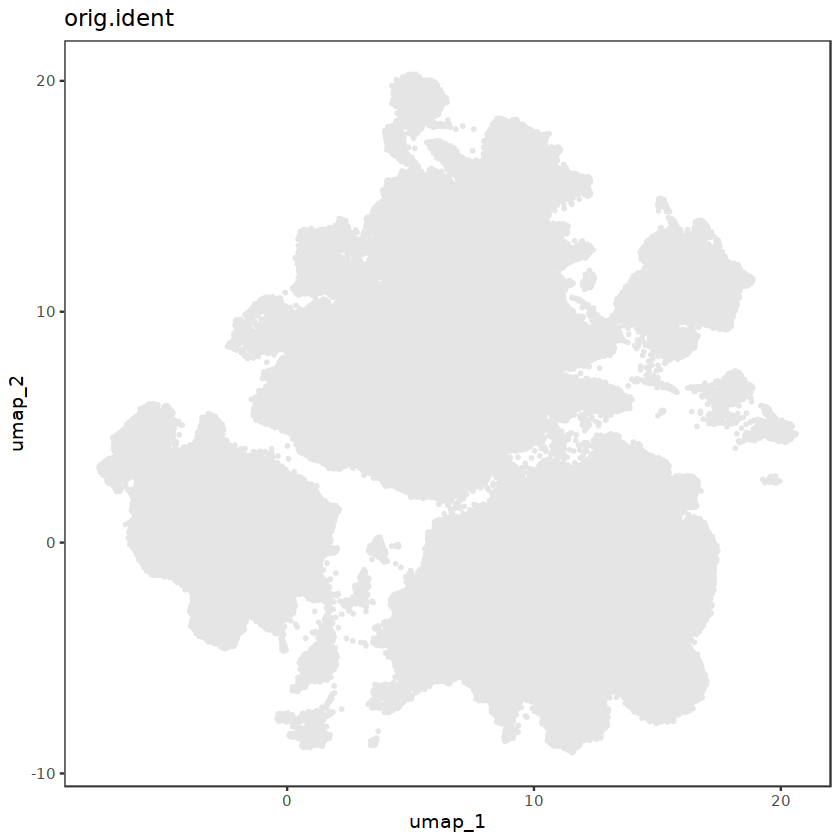

In [ ]:
p <- dittoDimPlot(reference, 
             reduction.use = "umap", var = "orig.ident", 
             do.label = F, size = 1,
                 color.panel = 'gray90') + NoLegend() +
            theme(
    panel.background = element_rect(fill = "transparent"), # bg of the panel
    plot.background = element_rect(fill = "transparent", color = NA), # bg of the plot
    panel.grid.major = element_blank(), # get rid of major grid
    panel.grid.minor = element_blank(), # get rid of minor grid
    legend.background = element_rect(fill = "transparent"), # get rid of legend bg
    legend.box.background = element_rect(fill = "transparent") # get rid of legend panel bg
  )
p

In [ ]:
ggsave(p, filename = 'figures/core_GBmap__greyBG.png', bg = "transparent")

Saving 6.67 x 6.67 in image



In [ ]:
gbm <- readRDS('data/mapped_Ruiz2021_to_core_GBmap.rds')

In [ ]:
gbm@meta.data$predicted.low_hierarchy<- factor(x = gbm@meta.data$predicted.low_hierarchy, 
                                   levels = c('AC-like', 'AC-like Prolif','MES-like hypoxia','MES-like no hypoxia',
     'OPC-like','OPC-like Prolif','NPC-like OPC','NPC-like neural','NPC-like Prolif',
     'Astrocyte','Oligodendrocyte','OPC','RG','Neuron',
     'Mono naive','Mono anti-infl','Mono hypoxia',
     'TAM-BDM hypoxia/MES','TAM-BDM MCH','TAM-BDM IFI','TAM-BDM anti-infl',
     'TAM-MG APOE/C', 'TAM-MG activated','TAM-MG pro-infl','TAM-MG prolif',
     'cDC1','cDC2','DC1','DC2','DC3',
     'Mast',
     'CD8 cytotoxic','CD8 EM', 'CD8 NK sig','CD4 rest', 'CD4 INF','Stress sig','Reg T','Prolif T','NK',
     'B cell','Plasma B','pDC',
     'Endo capilar', 'Endo arterial', 'Endo Venous',
     'Pericyte','Pericyte prolif', 'SMC','SMC prolif',
     'Perivascular fibroblast', 'Meningeal fibroblast'))


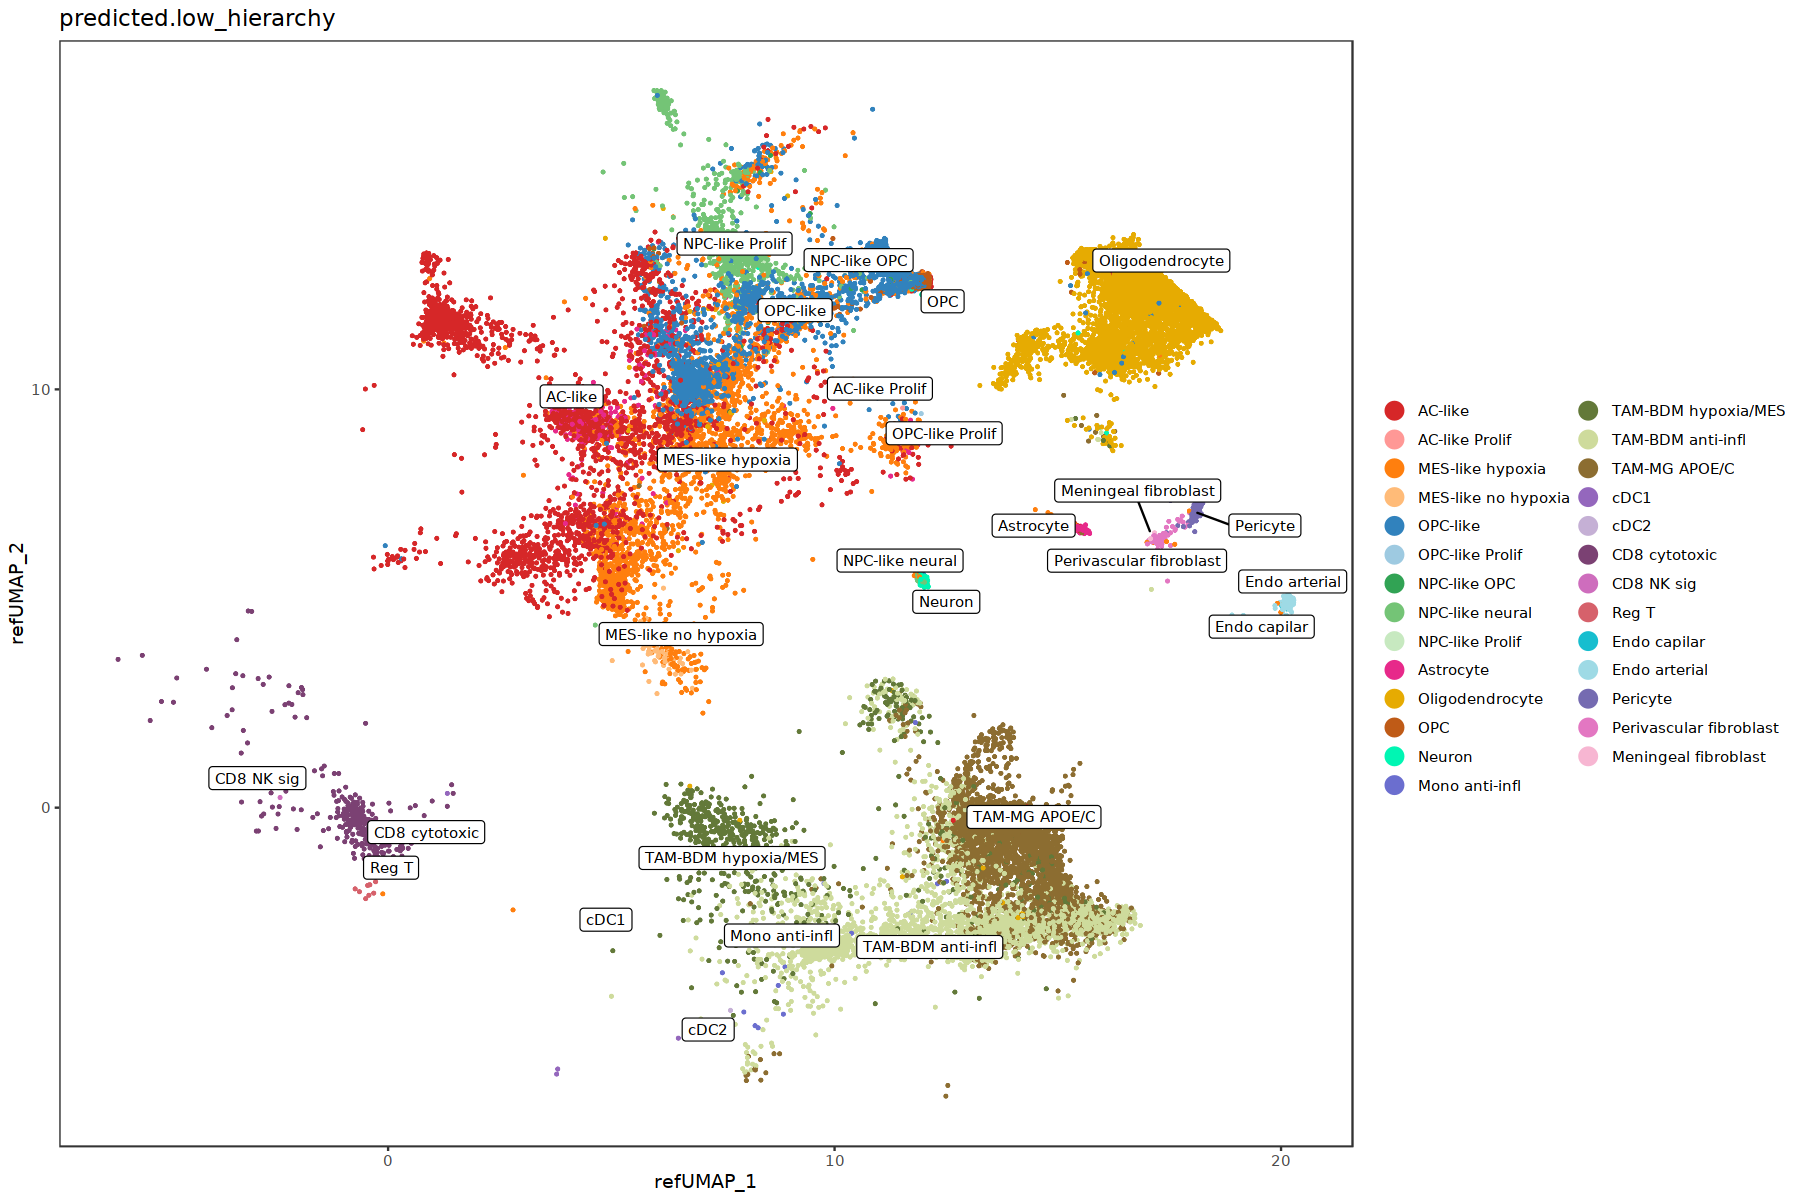

In [ ]:
options(repr.plot.height = 10, repr.plot.width = 15)
dittoDimPlot(gbm, 
             reduction.use = "ref.umap", var = "predicted.low_hierarchy", 
             color.panel = c('#d62728', '#ff9896', '#ff7f0e','#ffbb78', #AC/MES
                    '#3182bd','#9ecae1','#31a354','#74c476','#c7e9c0', #OPC/NPC
                    '#e7298a','#e6ab02', '#bf5b17','#00F6B3', #glia
                    '#6b6ecf', #mono
                    '#637939','#cedb9c', #BDM
                    '#8c6d31', #MG
                    '#9467bd','#c5b0d5', #DC
                    '#7b4173','#ce6dbd', '#d6616b', #TIL
                    '#17becf', '#9edae5', #endo
                    '#756bb1', '#e377c2','#f7b6d2'),
             do.raster = TRUE,
             do.label = T, labels.size = 3, size = 1)

In [ ]:
ggsave('figures/Ruiz2021_mapped_to_atlas_detailed_states.pdf', height = 9,
       width = 13)

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



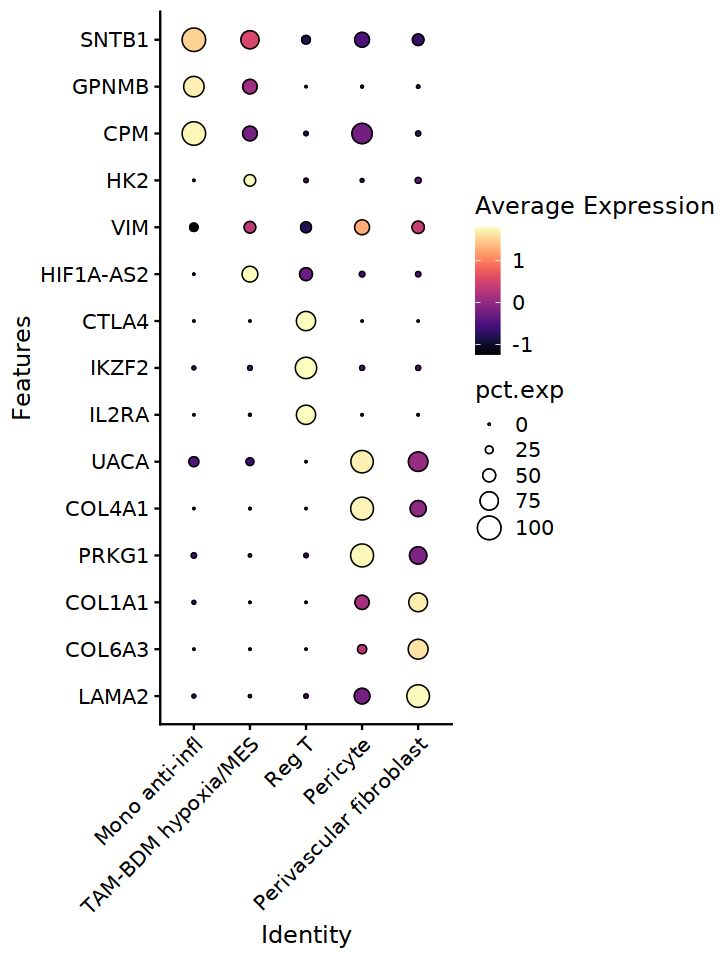

In [ ]:
options(repr.plot.height = 8, repr.plot.width = 6)
Idents(gbm) <- gbm@meta.data$predicted.low_hierarchy
DotPlot(subset(gbm, idents = c('Mono anti-infl',
                               'TAM-BDM hypoxia/MES',
                               'Reg T',
                              
                              'Pericyte',
                              'Perivascular fibroblast')), 
        group.by = 'predicted.low_hierarchy',
       features = c('LAMA2', 'COL6A3', 'COL1A1',
           'PRKG1', 'COL4A1','UACA', 
                    
                   
                    'IL2RA', 'IKZF2', 'CTLA4', # reg T
                    'HIF1A-AS2', 'VIM', 'HK2', # TAM-BDM hypoxia/MES
                    'CPM', 'GPNMB', 'SNTB1' # Mono anti-infl
                   )) + 
  RotatedAxis() + coord_flip() +
  geom_point(aes(size=pct.exp), shape = 21, colour="black", stroke=0.5) +
  viridis::scale_colour_viridis(option="magma") +
  guides(size=guide_legend(override.aes=list(shape=21, colour="black", fill="white")))

In [ ]:
ggsave('figures/Ruiz2021_detailed_states_markers_v2.pdf', height = 8, width = 5)

Plots were arranged in Illustrator 